<a href="https://colab.research.google.com/github/leticiasbm/DSAnalytics/blob/main/MVP_Sprint_02_Let%C3%ADcia_Santos_Batista_de_Melo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Machine Learning e Analytics

**Nome:** Letícia Santos Batista de Melo

**Matrícula:** 4052025000754

**Dataset:** [Thyroid Disease - Doença da Tireoide](https://archive.ics.uci.edu/dataset/102/thyroid+disease)



## 1. Escopo, objetivo e definição do problema

O conjunto de dados "Thyroid Disease", com destaque para o arquivo sick.data, é um dataset multivariado real que reúne informações clínicas detalhadas de pacientes com suspeita ou diagnóstico de disfunções tireoidianas.

Este conjunto inclui variáveis como:

- Exames hormonais: TSH, T3, T4;
- Informações clínicas e comportamentais: histórico de gravidez, uso de medicamentos, cirurgias prévias;
- Dados demográficos: idade, sexo;
- Indicadores indiretos de comprometimento endócrino: presença de bócio, uso de lítio, entre outros.

O objetivo deste trabalho é aplicar técnicas de aprendizado de máquina supervisionado para classificar pacientes como saudáveis ou doentes, com base nos dados disponíveis. Essa abordagem visa contribuir para diagnósticos mais rápidos, precisos e com menor viés subjetivo, promovendo uma análise clínica mais eficiente.

Vale destacar que o dataset já foi previamente tratado durante o MVP de Análise Exploratória de Dados, e será utilizada a versão limpa e pronta para modelagem.


### 1.1. Atributos

Demográficos:

- **Age** (idade do paciente);
- **Sex** (sexo biológico do paciente - feminino/masculino);

Clínicos e Hormonais:

- **On_Thyroxine** (paciente faz uso de T4? - True/False);
- **Query_On_Thyroxine** (médico está considerando prescrever T4? - True/False);
- **On_Antithyroid_Medication** (usa medicamentos para reduzir atividade da tireoide? - True/False);
- **Sick** (está doente com alguma condição além da tireoidiana? - True/False);
- **Pregnant** (paciente está grávida? - True/False);
- **Thyroid_Surgery** (já passou por cirurgiana tireoide? - True/False);
- **I131_Treatment** (tratamento com iodo radioativo? - True/False);
- **Query_Hypothyroid** (suspeita de hipotireoidismo? - True/False);
- **Query_Hyperthyroid** (suspeita de hipertireoidismo? - True/False);
- **Lithium** (usa lítio? - True/False);
- **Goitre** (presença de bócio? - True/False);
- **Tumor** (possui algum tumor? - True/False);
- **Hypopituitary** (possui disfunção na hipófise? - True/False);
- **Psych** (possui histórico psiquiátrico? - True/False);
- **TSH_Measured** (foi feito o exame do hormônio? - True/False);
- **TSH** (nível do hormônio TSH (Hormônio Estimulante da Tireoide) - µIU/mL);
- **T3_Measured** (foi feito o exame do hormônio? - True/False);
- **T3** (nível do hormônio T3 (Triiodotironina) - ng/dL);
- **TT4_Measured** (foi feito o exame do hormônio? - True/False);
- **TT4** (nível do hormônio T4 (Tiroxina Total) - µg/dL);
- **T4U_Measured** (foi feito o exame do hormônio? - True/False);
- **T4U** (índice de captação da tiroxina);
- **FTI_Measured** (foi feito o exame do hormônio? - True/False);
- **FTI** (índice de T4 Livre - ng/dL);
- **TBG_Measured** (foi feito o exame do hormônio? - True/False);
- **TBG** (globulina ligadora de tiroxina - mg/L);
- **Referral_Source** (fonte de encaminhamento médico - hospital/autoencaminhado/médico);
- **Class** (diagnóstico final - negativo/doente).


## 2. Análise Exploratória de Dados

A análise exploratória de dados já foi realizada no primeiro MVP e pode ser consultada [clicando aqui](https://github.com/leticiasbm/DSAnalytics/blob/main/MVP_Sprint_01_Let%C3%ADcia_Santos_Batista_de_Melo.ipynb).



## 3. Reprodutibilidade e Ambiente

Neste bloco, serão importadas as bibliotecas necessárias para execução dos códigos que se seguem. Também serão definidas seeds fixas para reprodutibilidade.

In [ ]:
### Importação de Bibliotecas

# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Bibliotecas Básicas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Bibliotecas ML

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import learning_curve # Curva de aprendizado do modelo
from sklearn.model_selection import train_test_split # Particiona em treino e teste
from sklearn.model_selection import KFold # Folds de validação cruzada
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score # Executa a validação cruzada
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score # Exibição de acurácia do modelo
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.tree import DecisionTreeClassifier # Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # Naive Bayes
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Seed para Reprodutibilidade

SEED = 7
np.random.seed(SEED)
random.seed(SEED)

## 4. Carga e Preparação dos Dados

Conforme mencionado anteriormente, o dataset utilizado já foi preparado no MVP anterior e, neste MVP, será utilizada a matriz gerada após o processo de Winsorização.

In [ ]:
### Carga dos Dados

df = pd.read_csv("https://raw.githubusercontent.com/leticiasbm/DSAnalytics/refs/heads/main/Sprint2/Sick_Data_MVP2.csv", sep = ",")
df = pd.DataFrame(df)
df.dropna(inplace = True)
df.head()

,Age,Sex,On_Thyroxine,Query_On_Thyroxine,On_Antithyroid_Medication,Sick,Pregnant,Thyroid_Surgery,I131_Treatment,Query_Hypothyroid,...,T3_Measured,T3,TT4_Measured,TT4,T4U_Measured,T4U,FTI_Measured,FTI,TBG_Measured,Class
3,70.0,1.0,False,False,False,False,False,False,False,False,...,True,1.2,True,61.0,True,0.87,True,70.0,False,0.0
6,80.0,1.0,False,False,False,False,False,False,False,False,...,True,0.6,True,80.0,True,0.70,True,115.0,False,1.0
7,66.0,1.0,False,False,False,False,False,False,False,False,...,True,2.2,True,123.0,True,0.93,True,132.0,False,0.0
8,68.0,0.0,False,False,False,False,False,False,False,False,...,True,1.6,True,83.0,True,0.89,True,93.0,False,0.0
9,84.0,1.0,False,False,False,False,False,False,False,False,...,True,2.2,True,115.0,True,0.95,True,121.0,False,0.0


### 4.1. Preparação dos Dados - Treino e Teste - Folds

Os dados serão separados em treino e teste. Também serão criados os folds para validação cruzada.

In [ ]:
### Preparação dos dados

# Holdout - Treino e Teste

X = df.drop("Class", axis = 1) # atributos
y = df["Class"].astype(int) # classe

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,
                                                    random_state = SEED,
                                                    stratify = y)

# Criando Folds de Validação Cruzada

num_particoes = 10
kfold = StratifiedKFold(n_splits = num_particoes, shuffle = True,
                        random_state = SEED)

### 4.2. Seleção de Atributos

Será realizada Feature Selection (Seleção de Atributos) no DataFrame importado para avaliar quais colunas são mais relevantes.

Para isso, serão utilizados dois modelos, escolhidos de forma arbitrária:


*   Random Forest Classifier
*   Decision Tree Classifier



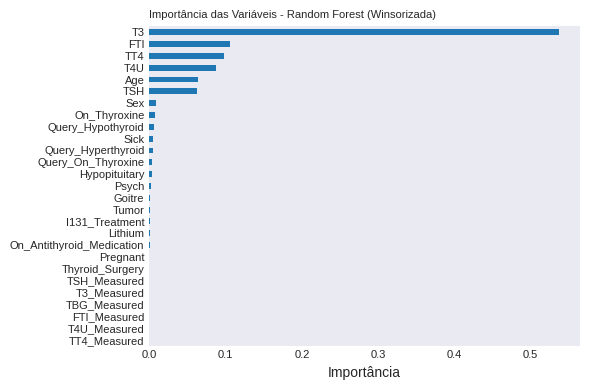

In [ ]:
### Seleção de Atributos com o RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)

plt.style.use("seaborn-v0_8-dark")
importances = pd.Series(model.feature_importances_, index = X.columns)
importances.sort_values().plot(kind = "barh", figsize = (6,4), fontsize = 8)
plt.title('Importância das Variáveis - Random Forest (Winsorizada)', loc = "left",
          fontsize = 8)
plt.xlabel('Importância')
plt.tight_layout()
plt.show()

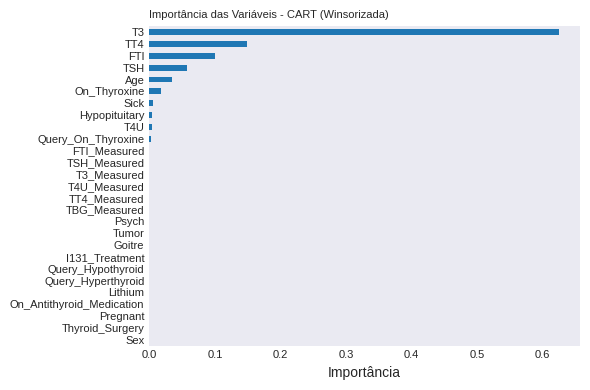

In [ ]:
### Seleção de atributos com o CART - DecisionTreeClassifier para validar se os resultados são os mesmos

model = DecisionTreeClassifier()
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index = X.columns)
importances.sort_values().plot(kind = "barh", figsize = (6,4), fontsize = 8)
plt.title('Importância das Variáveis - CART (Winsorizada)', loc = "left",
          fontsize = 8)
plt.xlabel('Importância')
plt.tight_layout()
plt.show()

Como pode ser visualizado nos gráficos anteriores, os resultados foram diferentes. A modelagem será realizada com a matriz completa e, os atributos serão selecionados mediante algoritmo que possuir maior acurácia.

## 5. Modelagem

LR: 0.949905 (0.013074)
KNN: 0.910087 (0.008564)
CART: 0.974297 (0.012545)
NB: 0.321691 (0.034775)
SVM: 0.919082 (0.002961)
Bagging: 0.976878 (0.010022)
RF: 0.967895 (0.012804)
ET: 0.950546 (0.011860)
Ada: 0.963395 (0.011492)
GB: 0.971737 (0.011192)
Voting: 0.951820 (0.011955)


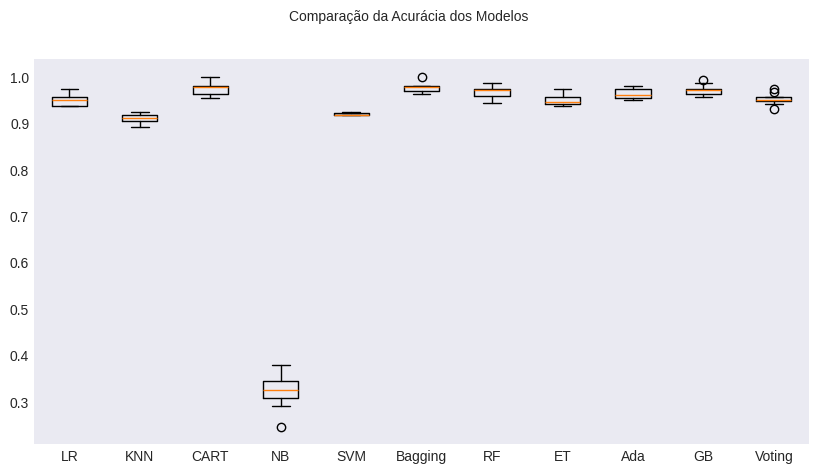

In [ ]:
### Modelagem

# Listas para armazenar modelos, resultados e nomes dos modelos

models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista

models.append(("LR", LogisticRegression(max_iter = 200)))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier

base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o Voting Classifier

bases = []
model1 = LogisticRegression(max_iter = 200)
bases.append(("Logistic", model1))

model2 = DecisionTreeClassifier()
bases.append(("CART", model2))

model3 = SVC()
bases.append(("SVM", model3))

# Criando os ensembles e adicionando-os na lista de modelos

models.append(("Bagging", BaggingClassifier(estimator = base, n_estimators = num_trees)))
models.append(("RF", RandomForestClassifier(n_estimators = num_trees, max_features = max_features)))
models.append(("ET", ExtraTreesClassifier(n_estimators = num_trees, max_features = max_features)))
models.append(("Ada", AdaBoostClassifier(n_estimators = num_trees)))
models.append(("GB", GradientBoostingClassifier(n_estimators = num_trees)))
models.append(("Voting", VotingClassifier(bases)))

# Avaliando um modelo por vez

for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = "accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Visualização gráfica dos modelos

fig = plt.figure(figsize = (10,5))
fig.suptitle("Comparação da Acurácia dos Modelos", fontsize = 10)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


O algoritmo de maior acurácia foi o Bagging, com 97,7% de acurácia e 0,01 de desvio padrão.
Dessa forma, seguiremos com a seleção de atributos definida pelo DecisionTreeClassifier, que foi um dos modelos utilizados em sua constituição.

### 5.1. Seleção de Atributos pelo DecisionTreeClassifier


In [ ]:
### Preparação dos dados

# Holdout - Treino e Teste

X = df[["T3", "TT4", "FTI", "TSH", "Age", "On_Thyroxine", "Query_On_Thyroxine", "Sex"]] # atributos
y = df["Class"].astype(int) # classe

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = SEED,
                                                    stratify = y)

# Criando Folds de Validação Cruzada

num_particoes = 10
kfold = StratifiedKFold(n_splits = num_particoes, shuffle = True, random_state = SEED)

### 5.2. Criando Pipelines

Nessa etapa, serão criados os pipelines de processamento, visando evitar o data leakage. Além disso, serão comparados os modelos com os dados originais, dados normalizados e dados padronizados.

LR-orig: 0.949 (0.014)
KNN-orig: 0.911 (0.010)
CART-orig: 0.974 (0.014)
NB-orig: 0.930 (0.020)
SVM-orig: 0.919 (0.003)
Bag-orig: 0.978 (0.009)
RF-orig: 0.972 (0.015)
ET-orig: 0.967 (0.012)
Ada-orig: 0.968 (0.014)
GB-orig: 0.974 (0.010)
Vot-orig: 0.952 (0.015)
LR-padr: 0.950 (0.015)
KNN-padr: 0.963 (0.012)
CART-padr: 0.977 (0.011)
NB-padr: 0.930 (0.020)
SVM-padr: 0.960 (0.012)
Bag-padr: 0.976 (0.009)
RF-padr: 0.972 (0.016)
ET-padr: 0.966 (0.011)
Ada-padr: 0.968 (0.014)
GB-padr: 0.972 (0.011)
Vot-padr: 0.961 (0.013)
LR-norm: 0.919 (0.004)
KNN-norm: 0.947 (0.010)
CART-norm: 0.973 (0.013)
NB-norm: 0.930 (0.020)
SVM-norm: 0.920 (0.004)
Bag-norm: 0.974 (0.011)
RF-norm: 0.972 (0.014)
ET-norm: 0.969 (0.010)
Ada-norm: 0.968 (0.014)
GB-norm: 0.972 (0.011)
Vot-norm: 0.920 (0.004)


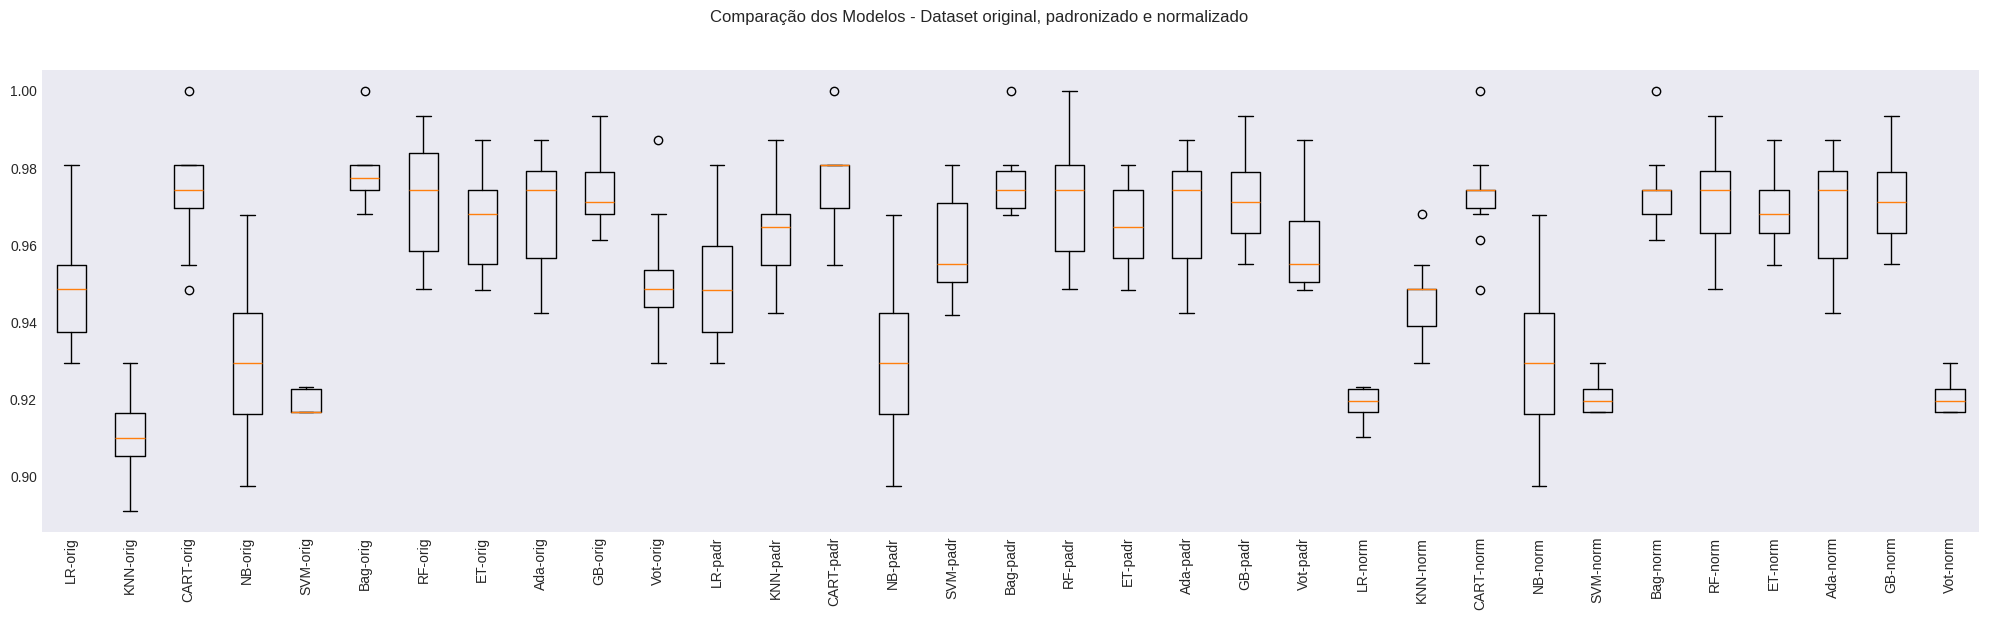

In [ ]:
# Definindo uma semente global para o bloco

np.random.seed(7)

# Listas para armazenar os pipelines e os resultados para todas as visões do dataset

pipelines = []
results = []
names = []

### Criando elementos do Pipeline

# Algoritmos

reg_log = ("LR", LogisticRegression(max_iter = 200))
knn = ("KNN", KNeighborsClassifier())
cart = ("CART", DecisionTreeClassifier())
naive_bayes = ("NB", GaussianNB())
svm = ("SVM", SVC())
bagging = ("Bag", BaggingClassifier(estimator = base, n_estimators = num_trees))
random_forest = ("RF", RandomForestClassifier(n_estimators = num_trees, max_features = max_features))
extra_trees = ("ET", ExtraTreesClassifier(n_estimators = num_trees, max_features = max_features))
adaboost = ("Ada", AdaBoostClassifier(n_estimators = num_trees))
gradient_boosting = ("GB", GradientBoostingClassifier(n_estimators = num_trees))
voting = ("Voting", VotingClassifier(bases))

# Transformações Utilizadas

standard_scaler = ("StandardScaler", StandardScaler())
min_max_scaler = ("MinMaxScaler", MinMaxScaler())

### Montando os Pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines

for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring = "accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos

fig = plt.figure(figsize = (25,6))
fig.suptitle('Comparação dos Modelos - Dataset original, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

Novamente, verifica-se que o algoritmo de maior acurácia é o Bagging com os dados originais (sem normalização e padronização), indicando que podemos seguir com ele como modelo de algoritmo.

### 5.3. Avaliando o Modelo - Dados de Teste

In [ ]:
### Avaliando o modelo com a base de teste

# Criando um modelo com todo o conjunto de treino

model = BaggingClassifier(estimator = base, n_estimators = num_trees)
model.fit(X_train, y_train)

# Fazendo predições no conjunto de teste

predictions = model.predict(X_test)

# Estimando acurácia no conjunto de teste
print(accuracy_score(y_test, predictions))

0.9794871794871794


### 5.4. Overfitting ou Underfitting

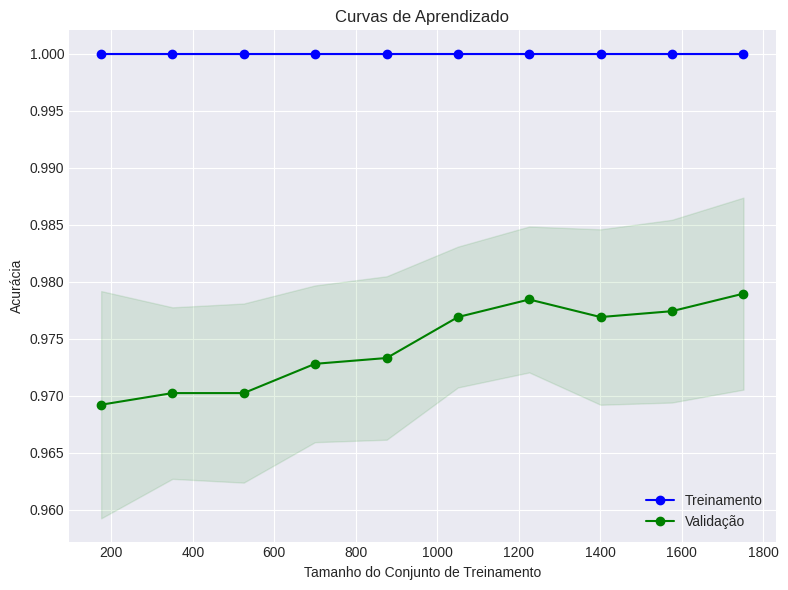

In [ ]:
### Avaliando se houve overfitting ou underfitting no modelo

train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv = StratifiedKFold(n_splits = 10),
                                                       scoring = "accuracy",
                                                       train_sizes = np.linspace(0.1, 1.0, 10), random_state = SEED)

# Média e desvio padrão
train_mean = train_scores.mean(axis = 1)
train_std = train_scores.std(axis = 1)
val_mean = val_scores.mean(axis = 1)
val_std = val_scores.std(axis = 1)

# Plot
plt.figure(figsize = (8, 6))
plt.plot(train_sizes, train_mean, 'o-', color = 'blue', label = 'Treinamento')
plt.plot(train_sizes, val_mean, 'o-', color = 'green', label = 'Validação')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='green')
plt.title("Curvas de Aprendizado")
plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("Acurácia")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()

Conforme indicado pelo gráfico, houve overfitting dos dados de treino, pois a acurácia se mantém em 1 para dados de treinamento.
Dessa forma, será alterada a complexidade do modelo base, com o ajuste de hiperparâmetros.

### 5.5. Ajuste de Hiperparâmetros do Modelo Base

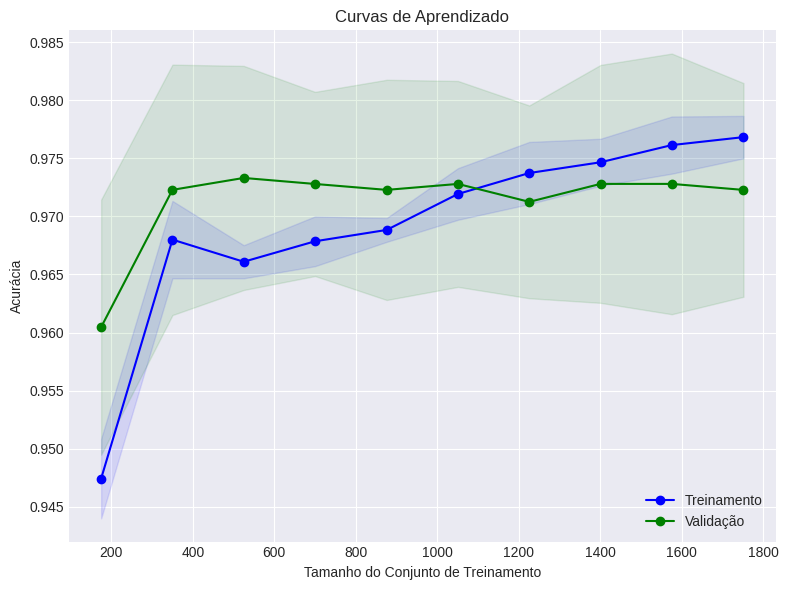

In [ ]:
# Ajuste de Hiperparâmetros do Modelo DecisionTreeClassifier

num_trees = 200
max_features = 3
base = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 10, random_state = SEED)
bagging = BaggingClassifier(estimator = base, n_estimators = num_trees, random_state = SEED)

bagging.fit(X,y)

### Avaliando se houve overfitting ou underfitting no modelo

train_sizes, train_scores, val_scores = learning_curve(bagging, X, y, cv = StratifiedKFold(n_splits = 10),
                                                       scoring = "accuracy",
                                                       train_sizes = np.linspace(0.1, 1.0, 10), random_state = SEED)

# Média e desvio padrão
train_mean = train_scores.mean(axis = 1)
train_std = train_scores.std(axis = 1)
val_mean = val_scores.mean(axis = 1)
val_std = val_scores.std(axis = 1)

# Plot
plt.figure(figsize = (8, 6))
plt.plot(train_sizes, train_mean, 'o-', color = 'blue', label = 'Treinamento')
plt.plot(train_sizes, val_mean, 'o-', color = 'green', label  ='Validação')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha = 0.1, color = 'blue')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha = 0.1, color = 'green')
plt.title("Curvas de Aprendizado")
plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("Acurácia")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()

Com o ajuste na complexidade do modelo base, verificamos que a acurácia dos dados de treinamento está alta e estável, indicando que o modelo está aprendendo bem os dados de treino.

Com relação aos dados de teste, a linha verde (validação) também está próxima da linha de treino, com uma leve diferença, o que é normal. O sombreado verde mostra a variabilidade dos folds de validação cruzada e, por ser pequena, indica baixa variabilidade.

Ou seja, o modelo está bem ajustado, não há sinais claros de overfitting e não há underfitting. Assim, conclui-se que o modelo está generalizando bem.

## 6. Conclusões e Próximos Passos